<a href="https://colab.research.google.com/github/kserdem/Veri-On-Isleme-Adimlari/blob/main/BoyutIndirgeme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset](https://www.kaggle.com/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level)



#Features Description
Following is the data dictionary for the features you will come across in the files mentioned:
* MEANRR - Mean of RR intervals
* MEDIANRR - Median of RR intervals
*SDRR - Standard deviation of RR intervals
*RMSSD - Root mean square of successive RR interval differences
*SDSD - Standard deviation of successive RR interval differences
*SDRRRMSSD - Ratio of SDRR / RMSSD
*pNN25 - Percentage of successive RR intervals that differ by more than 25 ms
*pNN50 - Percentage of successive RR intervals that differ by more than 50 ms
*KURT - Kurtosis of distribution of successive RR intervals
*SKEW - Skew of distribution of successive RR intervals
*MEANRELRR - Mean of relative RR intervals
*MEDIANRELRR - Median of relative RR intervals
*SDRRRELRR - Standard deviation of relative RR intervals
*RMSSDRELRR - Root mean square of successive relative RR interval differences
*SDSDRELRR - Standard deviation of successive relative RR interval differences
*SDRRRMSSDRELRR - Ratio of SDRR/RMSSD for relative RR interval differences
*KURTRELRR - Kurtosis of distribution of relative RR intervals
*SKEWRELRR - Skewness of distribution of relative RR intervals
*uuid - Unique ID for each patient
*VLF - Absolute power of the very low frequency band (0.0033 - 0.04 Hz)
*VLFPCT - Principal component transform of VLF
*LF - Absolute power of the low frequency band (0.04 - 0.15 Hz)
*LFPCT - Principal component transform of LF
*LFNU - Absolute power of the low frequency band in normal units
*HF - Absolute power of the high frequency band (0.15 - 0.4 Hz)
*HFPCT - Principal component transform of HF
*HFNU - Absolute power of the highest frequency band in normal units
*TP - Total power of RR intervals
*LFHF - Ratio of LF to HF
*HF_LF - Ratio of HF to LF
*SD1 - Poincaré plot standard deviation perpendicular to the line of identity
*SD2 - Poincaré plot standard deviation along the line of identity
*Sampen - sample entropy which measures the regularity and complexity of a time series
*higuci - higuci fractal dimension of heartrate
*datasetId - ID of the whole dataset
*condition - condition of the patient at the time the data was recorded
*HR - Heart rate of the patient at the time of data recorded

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 

# Verilerin okutulması ve tabloların birleştirilmesi

In [ ]:
data1= pd.read_csv("/content/drive/MyDrive/Colab_projects/VeriÖnİşleme/boyut_indirgeme_csv/frequency_domain_features_test.csv")
data1.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265


In [ ]:
data1=data1.set_index(['uuid'])
data1.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
uuid,,,,,,,,,,,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245
a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544
cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265


In [ ]:
data2= pd.read_csv("/content/drive/MyDrive/Colab_projects/VeriÖnİşleme/boyut_indirgeme_csv/heart_rate_non_linear_features_test.csv")
data2.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,8.347898,115.862444,2.209659,1.100715,2,time pressure
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,14.542096,77.118903,2.186132,1.290615,2,no stress
2,cb573d3a-c767-4556-b32e-ad8c08ded214,9.799336,125.044377,2.051571,1.226663,2,no stress
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,11.639185,302.029812,2.080910,1.085143,2,time pressure
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,7.266567,72.579248,2.068728,1.252547,2,interruption


In [ ]:
data2=data2.set_index(['uuid'])
data2.head()

,SD1,SD2,sampen,higuci,datasetId,condition
uuid,,,,,,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,8.347898,115.862444,2.209659,1.100715,2,time pressure
a99549ad-3eb6-4413-bc90-9053e7f7e684,14.542096,77.118903,2.186132,1.290615,2,no stress
cb573d3a-c767-4556-b32e-ad8c08ded214,9.799336,125.044377,2.051571,1.226663,2,no stress
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,11.639185,302.029812,2.080910,1.085143,2,time pressure
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,7.266567,72.579248,2.068728,1.252547,2,interruption


In [ ]:
data3= pd.read_csv("/content/drive/MyDrive/Colab_projects/VeriÖnİşleme/boyut_indirgeme_csv/time_domain_features_test.csv")
data3.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,62b75db5-bc40-4c8f-9166-daf0efcab4c2
1,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,a99549ad-3eb6-4413-bc90-9053e7f7e684
2,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,cb573d3a-c767-4556-b32e-ad8c08ded214
3,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,47a0c6de-2aef-4ac3-997d-252fa6fd07f1
4,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,de3fd54f-c74e-4fe8-bf2a-7a127f68b312


In [ ]:
data3=data3.set_index(['uuid'])
data3.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
uuid,,,,,,,,,,,,,,,,,,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075
a99549ad-3eb6-4413-bc90-9053e7f7e684,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689
cb573d3a-c767-4556-b32e-ad8c08ded214,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082


In [ ]:
data= pd.merge(data1, data2, left_index=True, right_index=True)
data.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
uuid,,,,,,,,,,,,,,,,,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245,8.347898,115.862444,2.209659,1.100715,2,time pressure
a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544,14.542096,77.118903,2.186132,1.290615,2,no stress
cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188,9.799336,125.044377,2.051571,1.226663,2,no stress
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963,11.639185,302.029812,2.080910,1.085143,2,time pressure
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265,7.266567,72.579248,2.068728,1.252547,2,interruption


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41033 entries, 62b75db5-bc40-4c8f-9166-daf0efcab4c2 to 0b654db0-e4d3-4ba3-b9ce-9c9291c8271e
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VLF        41033 non-null  float64
 1   VLF_PCT    41033 non-null  float64
 2   LF         41033 non-null  float64
 3   LF_PCT     41033 non-null  float64
 4   LF_NU      41033 non-null  float64
 5   HF         41033 non-null  float64
 6   HF_PCT     41033 non-null  float64
 7   HF_NU      41033 non-null  float64
 8   TP         41033 non-null  float64
 9   LF_HF      41033 non-null  float64
 10  HF_LF      41033 non-null  float64
 11  SD1        41033 non-null  float64
 12  SD2        41033 non-null  float64
 13  sampen     41033 non-null  float64
 14  higuci     41033 non-null  float64
 15  datasetId  41033 non-null  int64  
 16  condition  41033 non-null  object 
dtypes: float64(15), int64(1), object(1)
memory usage: 6.9+ MB


In [ ]:
data= pd.merge(data, data3, left_index=True, right_index=True)
data.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245,8.347898,115.862444,2.209659,1.100715,2,time pressure,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075
a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544,14.542096,77.118903,2.186132,1.290615,2,no stress,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689
cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188,9.799336,125.044377,2.051571,1.226663,2,no stress,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963,11.639185,302.029812,2.080910,1.085143,2,time pressure,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265,7.266567,72.579248,2.068728,1.252547,2,interruption,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41033 entries, 62b75db5-bc40-4c8f-9166-daf0efcab4c2 to 0b654db0-e4d3-4ba3-b9ce-9c9291c8271e
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VLF                41033 non-null  float64
 1   VLF_PCT            41033 non-null  float64
 2   LF                 41033 non-null  float64
 3   LF_PCT             41033 non-null  float64
 4   LF_NU              41033 non-null  float64
 5   HF                 41033 non-null  float64
 6   HF_PCT             41033 non-null  float64
 7   HF_NU              41033 non-null  float64
 8   TP                 41033 non-null  float64
 9   LF_HF              41033 non-null  float64
 10  HF_LF              41033 non-null  float64
 11  SD1                41033 non-null  float64
 12  SD2                41033 non-null  float64
 13  sampen             41033 non-null  float64
 14  higuci             41033 non-null  float64
 15  datasetId

# Veriye Ön Bakış
* Veriseti 35 sütun 41033 satırdan oluşmaktadır.
* Tüm gözlemler eksiksizdir.
* Tahmin değişkenimiz 3 sınıftan oluşan *condition* sütunudur.
* Her sütun için ölçüm metriği farklı olduğundan ve boyut indirgeme yöntemleri standartlaştırılmış veri kümesiyle daha verimli çalışığından standartlaştırma işlemi yapılmalıdır.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41033 entries, 62b75db5-bc40-4c8f-9166-daf0efcab4c2 to 0b654db0-e4d3-4ba3-b9ce-9c9291c8271e
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VLF                41033 non-null  float64
 1   VLF_PCT            41033 non-null  float64
 2   LF                 41033 non-null  float64
 3   LF_PCT             41033 non-null  float64
 4   LF_NU              41033 non-null  float64
 5   HF                 41033 non-null  float64
 6   HF_PCT             41033 non-null  float64
 7   HF_NU              41033 non-null  float64
 8   TP                 41033 non-null  float64
 9   LF_HF              41033 non-null  float64
 10  HF_LF              41033 non-null  float64
 11  SD1                41033 non-null  float64
 12  SD2                41033 non-null  float64
 13  sampen             41033 non-null  float64
 14  higuci             41033 non-null  float64
 15  datasetId

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,41033.0,2.196457e+03,1815.262687,160.869730,994.970318,1.665050e+03,2657.910801,12427.177612
VLF_PCT,41033.0,6.422104e+01,16.838147,19.301549,52.721914,6.624026e+01,76.845957,97.739588
LF,41033.0,9.488518e+02,577.413541,92.663980,544.688588,7.834525e+02,1210.276983,3290.093757
LF_PCT,41033.0,3.416810e+01,16.105461,2.163917,22.299698,3.217173e+01,44.754617,77.522361
LF_NU,41033.0,9.558661e+01,4.102133,70.682584,93.659224,9.665809e+01,98.794732,99.987029
HF,41033.0,3.901211e+01,44.994281,0.062809,10.551975,2.465485e+01,45.004948,360.877726
HF_PCT,41033.0,1.610860e+00,1.750709,0.002211,0.338246,1.034102e+00,2.237060,13.087775
HF_NU,41033.0,4.413387e+00,4.102133,0.012971,1.205268,3.341912e+00,6.340776,29.317416
TP,41033.0,3.184321e+03,1923.544936,378.053805,1820.982721,2.799393e+03,4055.490025,13249.507794
LF_HF,41033.0,1.171816e+02,368.039153,2.410942,14.770940,2.892299e+01,81.969112,7708.369846


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
condition,41033,3,no stress,22158


In [ ]:
data['condition'].unique()

array(['time pressure', 'no stress', 'interruption'], dtype=object)

In [ ]:
data= data.drop(['datasetId'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41033 entries, 62b75db5-bc40-4c8f-9166-daf0efcab4c2 to 0b654db0-e4d3-4ba3-b9ce-9c9291c8271e
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VLF                41033 non-null  float64
 1   VLF_PCT            41033 non-null  float64
 2   LF                 41033 non-null  float64
 3   LF_PCT             41033 non-null  float64
 4   LF_NU              41033 non-null  float64
 5   HF                 41033 non-null  float64
 6   HF_PCT             41033 non-null  float64
 7   HF_NU              41033 non-null  float64
 8   TP                 41033 non-null  float64
 9   LF_HF              41033 non-null  float64
 10  HF_LF              41033 non-null  float64
 11  SD1                41033 non-null  float64
 12  SD2                41033 non-null  float64
 13  sampen             41033 non-null  float64
 14  higuci             41033 non-null  float64
 15  condition

In [ ]:
data.corr()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
VLF,1.000000,0.675692,0.026110,-0.663685,0.107851,-0.011314,-0.393240,-0.107851,0.951280,0.123586,-0.096718,0.335608,0.795235,-0.293103,-0.570228,0.493458,0.393358,0.795161,0.335772,0.335608,0.612357,0.190088,0.526106,-0.041504,0.240716,-0.019281,0.241973,0.239561,0.085249,0.085248,0.306469,-0.041504,0.240716
VLF_PCT,0.675692,1.000000,-0.544133,-0.995339,0.046033,-0.286297,-0.461389,-0.046033,0.467619,0.101987,-0.040515,-0.286574,0.579489,-0.400502,-0.553642,0.382913,0.308331,0.578041,-0.286412,-0.286574,0.635711,-0.391719,-0.006666,0.100385,0.228187,0.015266,0.594668,-0.349838,-0.340899,-0.340899,0.281795,0.100385,0.228187
LF,0.026110,-0.544133,1.000000,0.572661,0.251599,0.318100,-0.034708,-0.251599,0.332263,0.096931,-0.240332,0.889929,-0.021263,0.227365,0.037587,0.082455,0.087970,-0.019221,0.889874,0.889929,-0.278897,0.917179,0.675303,-0.149935,-0.074426,-0.031691,-0.553209,0.788301,0.530512,0.530512,0.073141,-0.149935,-0.074426
LF_PCT,-0.663685,-0.995339,0.572661,1.000000,0.043156,0.221369,0.373677,-0.043156,-0.449244,-0.080544,-0.048437,0.308091,-0.574627,0.419001,0.499534,-0.330096,-0.257251,-0.573147,0.307928,0.308091,-0.635853,0.416492,0.010061,-0.116135,-0.238514,-0.017125,-0.609094,0.335354,0.296506,0.296506,-0.220256,-0.116135,-0.238514
LF_NU,0.107851,0.046033,0.251599,0.043156,1.000000,-0.743974,-0.839755,-1.000000,0.159902,0.279247,-0.996305,0.195443,0.009969,0.300778,-0.578421,0.637154,0.631427,0.010262,0.195422,0.195443,-0.037428,0.229726,-0.004620,-0.222568,-0.204164,-0.037064,-0.129493,-0.235855,-0.573682,-0.573682,0.759747,-0.222568,-0.204164
HF,-0.011314,-0.286297,0.318100,0.221369,-0.743974,1.000000,0.717111,0.743974,0.108202,-0.218769,0.751838,0.328886,0.043566,-0.166077,0.432462,-0.554767,-0.552826,0.044378,0.328885,0.328886,-0.066278,0.265465,0.406689,0.087978,0.187789,0.010284,-0.169521,0.730622,0.883235,0.883235,-0.582073,0.087978,0.187789
HF_PCT,-0.393240,-0.461389,-0.034708,0.373677,-0.839755,0.717111,1.000000,0.839755,-0.364748,-0.239937,0.835259,-0.078011,-0.287249,-0.002563,0.729469,-0.646136,-0.598938,-0.286935,-0.078075,-0.078011,-0.264747,-0.063961,-0.028443,0.102880,-0.000499,0.010714,-0.116168,0.279661,0.551063,0.551064,-0.684056,0.102880,-0.000499
HF_NU,-0.107851,-0.046033,-0.251599,-0.043156,-1.000000,0.743974,0.839755,1.000000,-0.159902,-0.279247,0.996305,-0.195443,-0.009969,-0.300778,0.578421,-0.637154,-0.631427,-0.010262,-0.195422,-0.195443,0.037428,-0.229726,0.004620,0.222568,0.204164,0.037064,0.129493,0.235855,0.573682,0.573682,-0.759747,0.222568,0.204164
TP,0.951280,0.467619,0.332263,-0.449244,0.159902,0.108202,-0.364748,-0.159902,1.000000,0.140609,-0.145831,0.591549,0.745105,-0.212237,-0.516729,0.477455,0.384690,0.745667,0.591687,0.591549,0.492616,0.460918,0.708716,-0.082118,0.209217,-0.027468,0.058323,0.479799,0.260360,0.260360,0.297557,-0.082118,0.209217
LF_HF,0.123586,0.101987,0.096931,-0.080544,0.279247,-0.218769,-0.239937,-0.279247,0.140609,1.000000,-0.258890,0.166147,0.015827,0.107454,-0.241489,0.432048,0.418981,0.016006,0.166131,0.166147,-0.039757,0.182198,0.065220,-0.074498,-0.079283,0.004620,-0.050241,-0.069329,-0.203363,-0.203364,0.422331,-0.074498,-0.079283


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

* Birbiriyle yüksek korelasyona sahip çok fazla değişken var.

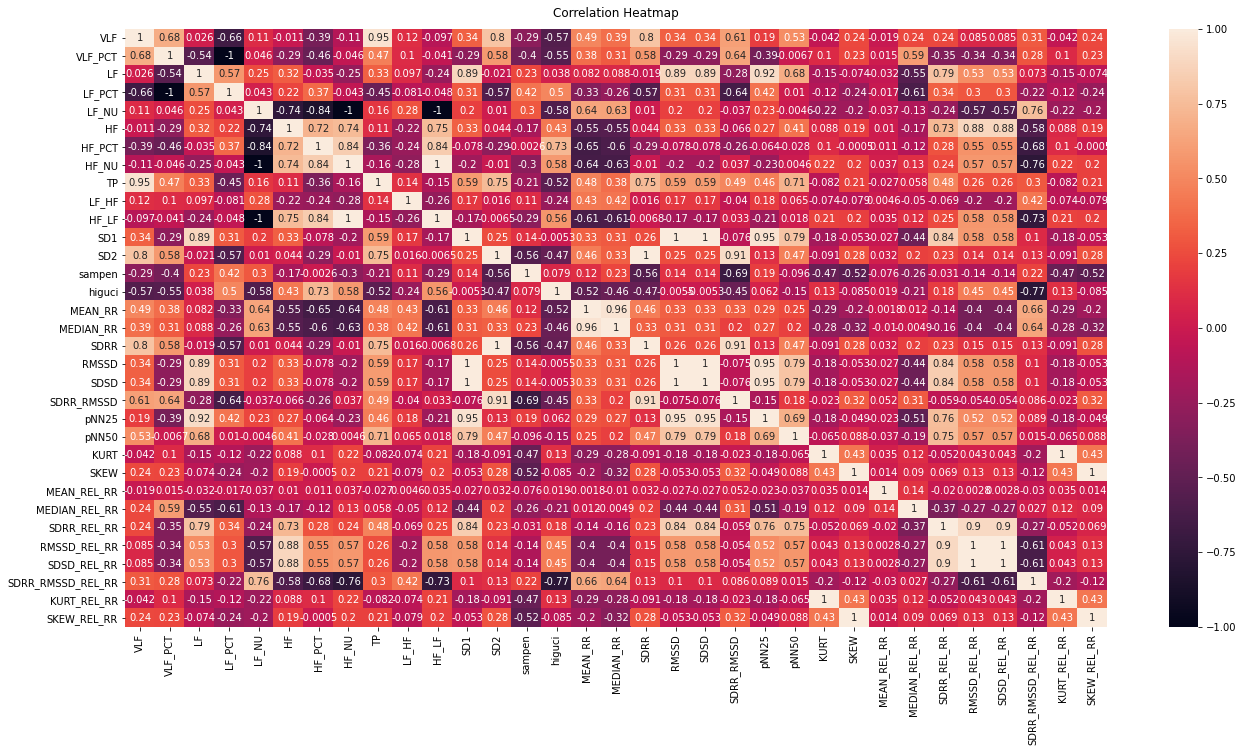

In [ ]:

plt.figure(figsize=(22, 11))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Verisetinin test ve train olarak ayrılması 
* Train datasından test datasına bilgi akışı olmasını istemediğimiz için herhangi bir uygulamadan önce veri setini train ve test olarak ayırmak isteriz. 

In [ ]:
data['condition']=data['condition'].replace(['time pressure', 'no stress', 'interruption'],[0,1,2])

In [ ]:
y=data['condition']
x= data.drop(['condition'],axis=1)
x.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245,8.347898,115.862444,2.209659,1.100715,2,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075
a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544,14.542096,77.118903,2.186132,1.290615,2,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689
cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188,9.799336,125.044377,2.051571,1.226663,2,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963,11.639185,302.029812,2.080910,1.085143,2,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265,7.266567,72.579248,2.068728,1.252547,2,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x, y,test_size=0.33, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (27492, 34)
y_train (27492,)
X_test (13541, 34)
y_test (13541,)


In [ ]:
y.head()

uuid
62b75db5-bc40-4c8f-9166-daf0efcab4c2    0
a99549ad-3eb6-4413-bc90-9053e7f7e684    1
cb573d3a-c767-4556-b32e-ad8c08ded214    1
47a0c6de-2aef-4ac3-997d-252fa6fd07f1    0
de3fd54f-c74e-4fe8-bf2a-7a127f68b312    2
Name: condition, dtype: int64

# Verisetinin Standartlaştırılması

* Burada X_train setinde fit_transform() kullanarak veri setinin varyans ve ortalamasını modele öğretiyoruz. Buradan öğrenilen parametlerle ise X_test setini ölçeklendirme için kullanılır.
* **Peki bunun önemi nedir ?**
* Eğer test verisindede fit_transform() kullanacak olsak her feature için yeni bir varyans ve ortalama hesaplanır ve istemeden modelimizin test verilerinide öğrenmiş olur ve kuracağımız modelden elde edeceğimiz accuracy yanıltıcı olur.
*Kısacası standartlaştırma işlemi yapılırken train seti uzerinden varyans ortalama gibi parametreler elde edilir ve test seti model için gizliliğini korumuş olur

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
 
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

Accuracy : 0.6077099180267336
              precision    recall  f1-score   support

           0       0.99      0.06      0.11      2287
           1       0.59      0.97      0.73      7288
           2       0.77      0.26      0.39      3966

    accuracy                           0.61     13541
   macro avg       0.78      0.43      0.41     13541
weighted avg       0.71      0.61      0.53     13541



#LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
 


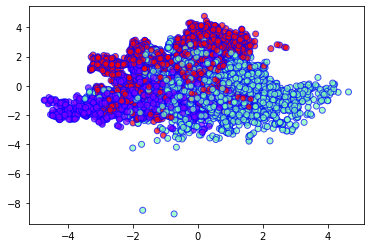

In [ ]:
# plot the scatterplot
plt.scatter(
    X_train_lda[:,0],X_train_lda[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [ ]:
# Her bileşen için açıklanan varyans yüzdesi-LDA
print('explained variance ratio LDA(first two components): %s'
% str(lda.explained_variance_ratio_))

explained variance ratio LDA(first two components): [0.59018721 0.40981279]


In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_lda, y_train)
y_pred = classifier.predict(X_test_lda)
 
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))


Accuracy : 0.6447086625803117
[[ 737 1429  121]
 [ 136 6749  403]
 [ 345 2377 1244]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.32      0.42      2287
           1       0.64      0.93      0.76      7288
           2       0.70      0.31      0.43      3966

    accuracy                           0.64     13541
   macro avg       0.65      0.52      0.54     13541
weighted avg       0.65      0.64      0.61     13541



#PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()  
X_train_pca  = pca.fit_transform(X_train_std)  
X_test_pca  = pca.transform(X_test_std)  


In [ ]:
exp_var= pca.explained_variance_ratio_

In [ ]:
#modeldeki bileşenlerin varyanslarının birikimli açıklama oranlarına bakalım
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:15]


array([26.76, 52.46, 71.78, 79.32, 83.2 , 86.38, 89.29, 92.15, 94.06,
       95.58, 96.71, 97.46, 98.15, 98.78, 99.12])

Text(0, 0.5, 'Cumulative Explained Variance')

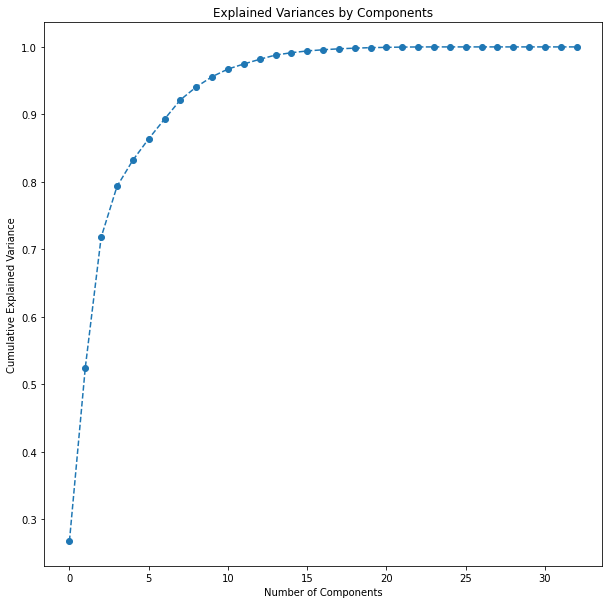

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)
 
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

Accuracy : 0.5388819141865445
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2287
           1       0.54      1.00      0.70      7288
           2       1.00      0.00      0.00      3966

    accuracy                           0.54     13541
   macro avg       0.51      0.33      0.23     13541
weighted avg       0.58      0.54      0.38     13541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Sparse PCA
* Kullandığım veriseti sparse değil sadece uyulama amaçlı yapılmıştır.

In [ ]:
from sklearn.decomposition import SparsePCA

In [ ]:
sparse = SparsePCA( alpha=0.0001)

In [ ]:
X_train_sparse = sparse.fit_transform(X_train_std)
X_test_sparse =sparse.transform(X_test_std)


In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_sparse, y_train)
y_pred = classifier.predict(X_test_sparse)
 
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

Accuracy : 0.5408758585038033
              precision    recall  f1-score   support

           0       1.00      0.00      0.01      2287
           1       0.54      1.00      0.70      7288
           2       1.00      0.01      0.01      3966

    accuracy                           0.54     13541
   macro avg       0.85      0.34      0.24     13541
weighted avg       0.75      0.54      0.38     13541



##Randomized PCA

In [ ]:
rand = PCA( svd_solver='randomized')
X_train_rand = rand.fit_transform(X_train_std)
X_test_rand =rand.transform(X_test_std)



In [ ]:
np.cumsum(np.round(rand.explained_variance_ratio_, decimals = 4)*100)[0:15]


array([26.76, 52.46, 71.78, 79.32, 83.2 , 86.38, 89.29, 92.15, 94.06,
       95.58, 96.71, 97.46, 98.15, 98.78, 99.12])

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_rand, y_train)
y_pred = classifier.predict(X_test_rand)
 
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

Accuracy : 0.5388819141865445
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2287
           1       0.54      1.00      0.70      7288
           2       1.00      0.00      0.00      3966

    accuracy                           0.54     13541
   macro avg       0.51      0.33      0.23     13541
weighted avg       0.58      0.54      0.38     13541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rand.explained_variance_ratio_

array([2.67609482e-01, 2.57002567e-01, 1.93228136e-01, 7.53993013e-02,
       3.88363000e-02, 3.17928606e-02, 2.91184960e-02, 2.85720658e-02,
       1.91266233e-02, 1.52013035e-02, 1.12873035e-02, 7.52773401e-03,
       6.90722064e-03, 6.33274003e-03, 3.43058285e-03, 2.66973387e-03,
       1.72094969e-03, 1.42095846e-03, 9.56572336e-04, 7.60297214e-04,
       4.32523828e-04, 4.12579831e-04, 1.82161649e-04, 7.14972971e-05,
       5.12791841e-09, 3.65943909e-09, 1.21545362e-12, 1.36790336e-30,
       1.95770802e-32, 1.64958036e-33, 1.64958036e-33, 1.08731445e-33,
       1.99189818e-34])

Text(0, 0.5, 'Cumulative Explained Variance')

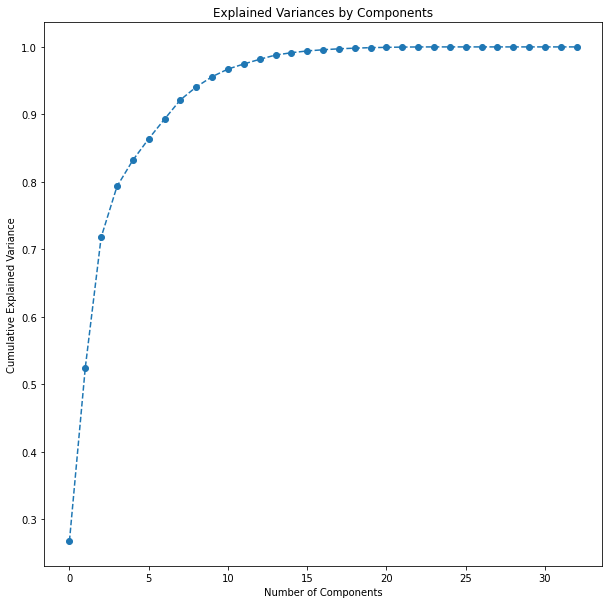

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(rand.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

## Incremental PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA
 

In [ ]:
inc = IncrementalPCA( batch_size=200)

In [ ]:
X_train_inc = inc.fit_transform(X_train_std)
X_test_inc =inc.transform(X_test_std)


In [ ]:
np.cumsum(np.round(inc.explained_variance_ratio_, decimals = 4)*100)[0:15]


array([26.76, 52.46, 71.78, 79.32, 83.2 , 86.38, 89.29, 92.15, 94.06,
       95.58, 96.71, 97.46, 98.15, 98.78, 99.12])

Text(0, 0.5, 'Cumulative Explained Variance')

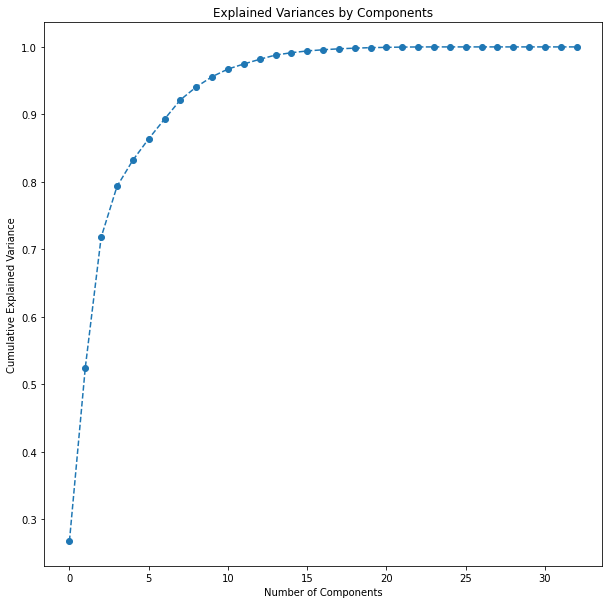

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(inc.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")



In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_inc, y_train)
y_pred = classifier.predict(X_test_inc)
 
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

Accuracy : 0.5432390517687025
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2287
           1       0.54      1.00      0.70      7288
           2       1.00      0.02      0.03      3966

    accuracy                           0.54     13541
   macro avg       0.51      0.34      0.25     13541
weighted avg       0.58      0.54      0.39     13541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Kernel PCA

In [ ]:
from sklearn.decomposition import  KernelPCA

In [ ]:
kpca = KernelPCA(kernel='rbf', gamma=1)
X_train_kernel = kpca.fit_transform(X_train_std)
X_test_kernel = kpca.transform(X_test_std)



#tSNE


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
?tsne

In [ ]:
df=data.copy()

In [ ]:
y=data['condition']
x= data.drop(['condition'],axis=1)

In [ ]:
scaler= StandardScaler().fit_transform(x)

In [ ]:
tsne = TSNE( random_state=1)  
X_train_tsne = tsne.fit_transform(scaler)


In [ ]:
data_tsne = pd.DataFrame(data = X_train_tsne, columns = ['Component 1', 'Component 2'])
data_tsne.head()

,Component 1,Component 2
0,43.037846,-5.628581
1,-0.987097,-71.179306
2,3.084134,48.794552
3,-26.547972,32.373047
4,13.452457,-62.111691
